# Classification Example
This is an example of how numpy, pandas, seaborn and sklearn can be employed for analyzing and visualizing data as well as for performing a classification and model selection.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

## Load Data
This dataset contains sepal and petal measurements for 150 iris flowers from three classes.
### Features
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm
* class (Iris Setosa, Iris Versicolour, Iris Virginica)

In [2]:
df = pd.read_csv('dataset_iris.txt', encoding='utf-8', comment='#', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Correlation Analysis

In [3]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Visualize Data

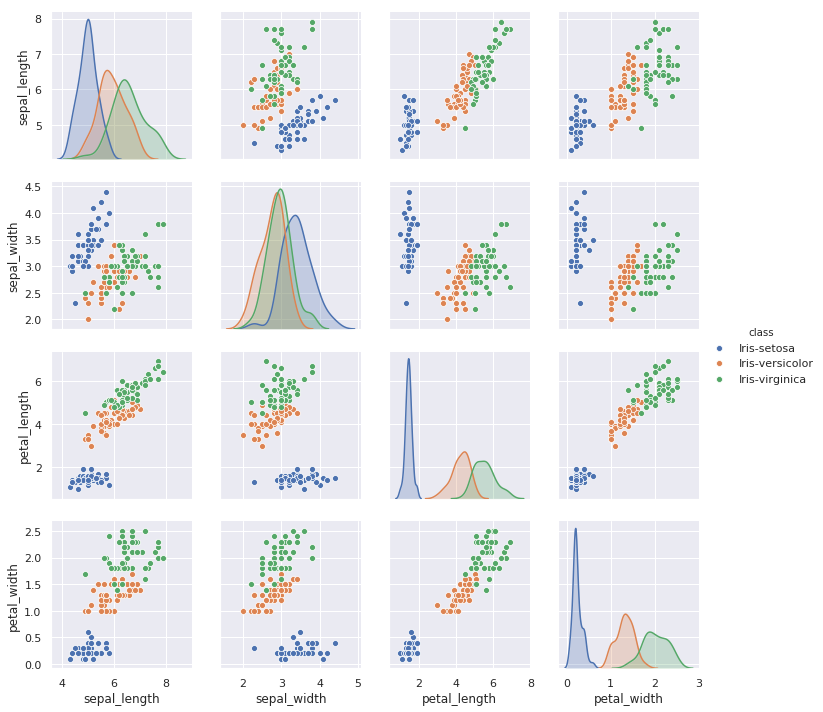

In [4]:
sns.pairplot(df, hue="class")
plt.show()

## Train/Test Split

In [5]:
target = 'class'
X = df.drop(target, axis=1).values
print(X.shape)
y = df[target].values
print(y.shape)

(150, 4)
(150,)


In [6]:
print(np.unique(y))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=12, stratify=y)

## Feature Scaling

In [8]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Classification

In [9]:
lr = LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=1)
lr.fit(X_train_sc, y_train)
print('Test accuracy %.2f' % lr.score(X_test_sc, y_test))

Test accuracy 0.98


In [10]:
kn = KNeighborsClassifier(n_neighbors=4)
kn.fit(X_train_sc, y_train)
print('Test accuracy %.2f' % kn.score(X_test_sc, y_test))

Test accuracy 1.00


In [11]:
p = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=4))
p.fit(X_train, y_train)
print('Test accuracy %.2f' % p.score(X_test, y_test))

Test accuracy 1.00


## Principal Component Analysis

In [12]:
pca = PCA(n_components=4)
pca.fit(X_train_sc, y_train)
pca.explained_variance_ratio_

array([0.72297126, 0.23006954, 0.04017573, 0.00678347])

In [13]:
pca_df = pd.DataFrame(data={'pc1': pca.transform(X_train_sc)[:,0], 'pc2': pca.transform(X_train_sc)[:,1], 'label': y_train})
pca_df.head()

,label,pc1,pc2
0,Iris-versicolor,0.939335,0.316002
1,Iris-virginica,2.133841,0.958123
2,Iris-setosa,-2.378428,-1.217173
3,Iris-versicolor,1.436008,0.398897
4,Iris-versicolor,1.120186,-0.592446


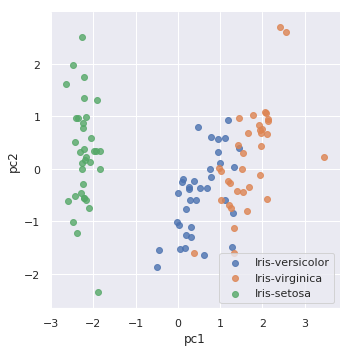

In [14]:
sns.lmplot(x='pc1', y='pc2', data=pca_df, fit_reg=False, hue='label', legend=False)
plt.legend(loc='lower right')
plt.show()

## Model Selection

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

pipelines = {
    'std_logr': make_pipeline(StandardScaler(), LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=1)),
    'std_knn1': make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1)),
    'std_knn4': make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=4)),
    'std_knn7': make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7)),
    'decision_tree': make_pipeline(DecisionTreeClassifier()),
    'random_forest': make_pipeline(RandomForestClassifier(n_estimators=100))
}

skf = StratifiedKFold(n_splits=10, random_state=42)

for name, pipeline in pipelines.items():
    scores = []
    for train, test in skf.split(X_train, y_train):
        pipeline.fit(X_train[train], y_train[train])
        score = pipeline.score(X_train[test], y_train[test])
        scores.append(score)
    print(name, '\tAccuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

decision_tree 	Accuracy: 0.931 +/- 0.098
std_knn7 	Accuracy: 0.967 +/- 0.041
std_knn1 	Accuracy: 0.931 +/- 0.083
std_logr 	Accuracy: 0.947 +/- 0.058
random_forest 	Accuracy: 0.931 +/- 0.098
std_knn4 	Accuracy: 0.950 +/- 0.067


In [16]:
best = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7))
best.fit(X_train, y_train)
best.score(X_test, y_test)

0.9777777777777777